### Example 2: Pendulum
---

Now let's try a slightly different/harder example. Let's solve:
$$ \ddot{\theta}(t) = -\frac{g}{L} \sin\theta(t); \quad \theta(0)=\pi/4, \dot{\theta}(0)=0 $$
on the domain $t \in [0, 5]$

In [43]:
using NeuralPDE, Lux, Random
using OrdinaryDiffEq, OptimizationOptimisers, Plots

#Constants
const g = 9.81
L = 1.0

#Initial Conditions
u₀ = [0, π / 4]
tspan = (0.0, 5);

# Define ODE problem in out-of-place form
params = [g, L]
prob = ODEProblem((u, p, t) -> [u[2]; -(p[1] / p[2]) * sin(u[1])], u₀, tspan, params)

rng = Random.default_rng()
Random.seed!(rng, 0)

n = 4
act = tanh
chain = Chain(Dense(1, n, act), Dense(n, 2))

ps, st = Lux.setup(rng, chain) |> Lux.f64

opt = Adam(0.05)

alg = NNODE(chain, opt, init_params = ps)

solNN = solve(prob, alg, verbose = true, maxiters = 5000, saveat = 0.01)

[NNODE]	Iter: [   1/5000]	Loss: 14469.6
[NNODE]	Iter: [   2/5000]	Loss: 11104.2
[NNODE]	Iter: [   3/5000]	Loss: 11913.4
[NNODE]	Iter: [   4/5000]	Loss: 11203.4
[NNODE]	Iter: [   5/5000]	Loss: 9694.87
[NNODE]	Iter: [   6/5000]	Loss: 9056.67
[NNODE]	Iter: [   7/5000]	Loss: 9370.85
[NNODE]	Iter: [   8/5000]	Loss: 8194.01
[NNODE]	Iter: [   9/5000]	Loss: 7751.33
[NNODE]	Iter: [  10/5000]	Loss: 7820.65
[NNODE]	Iter: [  11/5000]	Loss: 7393.11
[NNODE]	Iter: [  12/5000]	Loss: 6807.66
[NNODE]	Iter: [  13/5000]	Loss: 6467.29
[NNODE]	Iter: [  14/5000]	Loss: 6279.74
[NNODE]	Iter: [  15/5000]	Loss: 6114.2
[NNODE]	Iter: [  16/5000]	Loss: 5695.86
[NNODE]	Iter: [  17/5000]	Loss: 5233.38
[NNODE]	Iter: [  18/5000]	Loss: 4927.46
[NNODE]	Iter: [  19/5000]	Loss: 4836.06
[NNODE]	Iter: [  20/5000]	Loss: 4548.79
[NNODE]	Iter: [  21/5000]	Loss: 4128.59
[NNODE]	Iter: [  22/5000]	Loss: 4146.36
[NNODE]	Iter: [  23/5000]	Loss: 3775.05
[NNODE]	Iter: [  24/5000]	Loss: 3522.9
[NNODE]	Iter: [  25/5000]	Loss: 3448.59
[N

retcode: Success
Interpolation: Trained neural network interpolation
t: 0.0:0.01:5.0
u: 501-element Vector{Vector{Float64}}:
 [0.0, 0.7853981633974483]
 [-0.00037397809184486485, 0.7814494290714596]
 [-0.0007028789161246418, 0.777491726075308]
 [-0.0009884846923969575, 0.7735255359008988]
 [-0.0012325409841752722, 0.7695513321912101]
 [-0.0014367548376154227, 0.765569580307974]
 [-0.001602793182550054, 0.7615807369602091]
 [-0.0017322814836010015, 0.7575852498907537]
 [-0.001826802628551385, 0.7535835576178171]
 [-0.0018878960407697591, 0.7495760892284798]
 [-0.0019170570022339962, 0.7455632642210146]
 [-0.0019157361735911206, 0.7415454923928757]
 [-0.001885339297694839, 0.7375231737712025]
 ⋮
 [0.04331168671218634, -0.08394211551381237]
 [0.045011609563821, -0.08605705769724836]
 [0.04673322265415461, -0.08819727473991001]
 [0.04847657170043888, -0.09036284643314241]
 [0.050241701721514404, -0.09255385147008388]
 [0.052028657045074714, -0.0947703674551259]
 [0.0538374813149653, -0.097

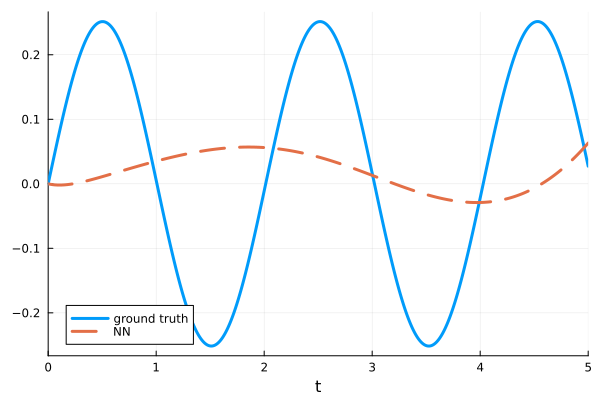

In [44]:
# Now solve with an IVP timestepper and compare 
ground_truth = solve(prob, Tsit5());

plot(ground_truth, idxs=[1], lw=3, label = "ground truth")
plot!(solNN, idxs=[1], line=(3, :dash), label = "NN")

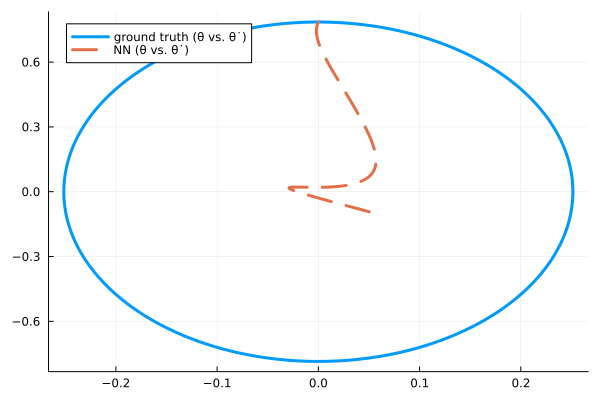

In [45]:
plot(ground_truth, idxs=(1,2), lw=3, label = "ground truth (θ vs. θ˙)")
plot!(solNN, idxs=(1,2), line=(3, :dash), label = "NN (θ vs. θ˙)")